In [18]:
log_path = "/home/atsushi22/test_log.txt"
start_callback_name = "Timer_callback"
finish_callback_name = "Regular_callback3"

In [19]:
with open(log_path, 'r') as f:
    lines = f.readlines()

In [20]:
flow_start_ns_list = []
flow_finish_ns_list = []
for line in lines:
    if f'[{start_callback_name}]: Flow start' in line:
        flow_start_ns = int(line.split(" ")[-1])
        flow_start_ns_list.append(flow_start_ns)
    if f'[{finish_callback_name}]: Flow finish' in line:
        flow_finish_ns = int(line.split(" ")[-1])
        flow_finish_ns_list.append(flow_finish_ns)

if len(flow_start_ns_list) != len(flow_finish_ns_list):
    raise NotImplementedError("Not same length!!!")

In [21]:
flow_latencies_ms = []
for flow_start_ns, flow_finish_ns in zip(flow_start_ns_list, flow_finish_ns_list):
    flow_latency_ms = (flow_finish_ns - flow_start_ns) * 10 ** (-6)
    flow_latencies_ms.append(flow_latency_ms)

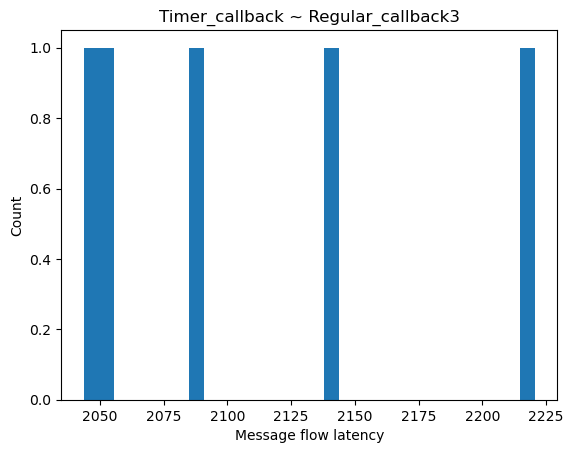

In [26]:
import numpy as np
import matplotlib.pyplot as plt

flow_latencies_ms = np.array(flow_latencies_ms)

# ヒストグラムを出力
plt.hist(flow_latencies_ms, bins=30)
plt.title(f"{start_callback_name} ~ {finish_callback_name}")
plt.xlabel("Message flow latency")
plt.ylabel("Count")
plt.show()
